Share Market Amazon Price Prediction Modal

Dataset Loaded Successfully
Columns: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
Dropped 1 rows with missing target
Numeric features used: ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
Category unique after top-K mapping: 41
Preprocessed feature shape: (1464, 45)
Train / Test sizes: 1171 293
TensorFlow available. Training NN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │        11,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,993 (207.00 KB)

 Trainable params: 52,993 (207.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/80
33/33 - 3s - 79ms/step - loss: 6.1027 - mae: 2.0582 - val_loss: 0.1883 - val_mae: 0.3448
Epoch 2/80
33/33 - 0s - 10ms/step - loss: 0.3974 - mae: 0.4967 - val_loss: 0.2057 - val_mae: 0.3837
Epoch 3/80
33/33 - 0s - 11ms/step - loss: 0.2627 - mae: 0.4041 - val_loss: 0.1086 - val_mae: 0.2780
Epoch 4/80
33/33 - 0s - 7ms/step - loss: 0.2356 - mae: 0.3784 - val_loss: 0.1015 - val_mae: 0.2595
Epoch 5/80
33/33 - 0s - 6ms/step - loss: 0.2248 - mae: 0.3687 - val_loss: 0.0793 - val_mae: 0.2259
Epoch 6/80
33/33 - 0s - 6ms/step - loss: 0.2198 - mae: 0.3712 - val_loss: 0.0674 - val_mae: 0.2010
Epoch 7/80
33/33 - 0s - 6ms/step - loss: 0.2135 - mae: 0.3603 - val_loss: 0.0736 - val_mae: 0.2111
Epoch 8/80
33/33 - 0s - 6ms/step - loss: 0.2068 - mae: 0.3508 - val_loss: 0.0729 - val_mae: 0.2083
Epoch 9/80
33/33 - 0s - 6ms/step - loss: 0.1911 - mae: 0.3409 - val_loss: 0.1235 - val_mae: 0.2892
Epoch 10/80
33/33 - 0s - 6ms/step - loss: 0.1884 - mae: 0.3412 - val_loss: 0.1117 - val_mae: 0.2756
E

Saved TF model -> amazon_rating_model_tf.h5

=== MODEL PERFORMANCE ===
MAE  = 0.207770
MSE  = 0.072854
RMSE = 0.269914
R2   = 0.061122

Sample predictions:
 actual  predicted
    4.2   4.206830
    3.7   3.993616
    3.3   3.664882
    4.3   4.097120
    3.9   4.100937
    4.5   4.204195
    4.1   4.102029
    4.1   3.988060
    4.2   3.809213
    3.6   3.829875
    3.1   4.090665
    3.9   4.100917
    4.5   4.239761
    4.1   4.244404
    4.4   4.158015
    4.4   4.061617
    4.5   4.188816
    4.0   4.098939
    4.2   4.087844
    3.1   3.722636


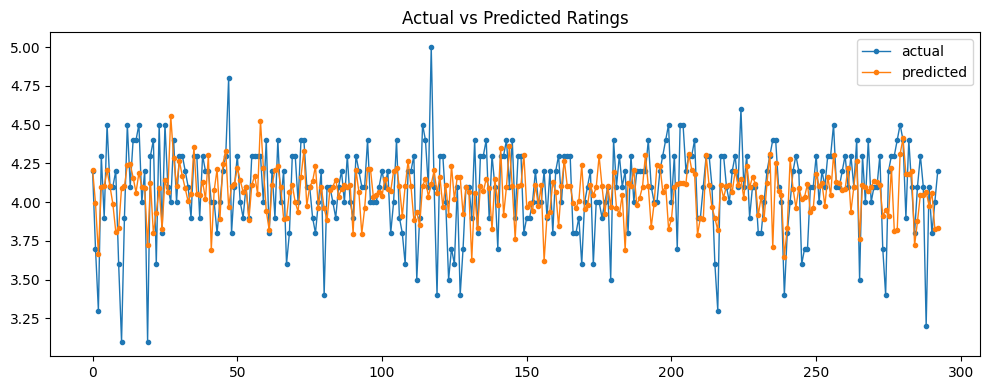


Done.


In [12]:
# Amazon Model
import re
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

FILE_NAME = "/content/sample_data/amazon.csv"
TARGET = "rating"
EPOCHS = 80
BATCH_SIZE = 32
SAVE_MODEL = True
RANDOM_STATE = 42

def to_float_price(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return float(x)
    s = str(x).strip()
    s = re.sub(r"[^\d\.\-]", "", s)
    return float(s) if s else np.nan

def to_float_percent(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return float(x)
    s = str(x).replace("%","").strip()
    s = re.sub(r"[^\d\.\-]", "", s)
    return float(s) if s else np.nan

def to_float_generic(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return float(x)
    s = re.sub(r"[^\d\.\-]", "", str(x))
    return float(s) if s else np.nan

# Load dataset
if not os.path.exists(FILE_NAME):
    raise FileNotFoundError(f"File not found: {FILE_NAME}")

df = pd.read_csv(FILE_NAME)
print("Dataset Loaded Successfully")
print("Columns:", df.columns.tolist())

if TARGET not in df.columns:
    raise ValueError(f"Target column '{TARGET}' not found")

data = df.copy()

if "discounted_price" in data.columns:
    data["discounted_price"] = data["discounted_price"].apply(to_float_price)
if "actual_price" in data.columns:
    data["actual_price"] = data["actual_price"].apply(to_float_price)
if "discount_percentage" in data.columns:
    data["discount_percentage"] = data["discount_percentage"].apply(to_float_percent)
if "rating_count" in data.columns:
    data["rating_count"] = data["rating_count"].apply(to_float_generic)

data[TARGET] = data[TARGET].apply(to_float_generic)

initial_len = len(data)
data = data.dropna(subset=[TARGET])
print(f"Dropped {initial_len - len(data)} rows with missing target")

numeric_candidates = ["discounted_price", "actual_price", "discount_percentage", "rating_count"]
numeric_features = [c for c in numeric_candidates if c in data.columns]
print("Numeric features used:", numeric_features)

cat_features = []
if "category" in data.columns:
    cat_features.append("category")

MAX_CATEGORIES = 40
if "category" in cat_features:
    top_cats = data["category"].value_counts().nlargest(MAX_CATEGORIES).index
    data["category"] = data["category"].where(data["category"].isin(top_cats), "OTHER")
    print("Category unique after top-K mapping:", data["category"].nunique())

features = numeric_features + cat_features
if not features:
    raise ValueError("No usable features found.")

X = data[features].copy()
y = data[TARGET].astype(float).copy()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

if cat_features:
    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="UNKNOWN")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # UPDATED
    ])

transformers = [("num", numeric_transformer, numeric_features)]
if cat_features:
    transformers.append(("cat", cat_transformer, cat_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop", sparse_threshold=0)

X_pre = preprocessor.fit_transform(X)
print("Preprocessed feature shape:", X_pre.shape)

X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=RANDOM_STATE)
print("Train / Test sizes:", X_train.shape[0], X_test.shape[0])

USE_TF = True
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    print("TensorFlow available. Training NN...")
except Exception:
    USE_TF = False
    print("TensorFlow unavailable. Switching to sklearn MLP.")

if USE_TF:
    model = Sequential([
        Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    print(model.summary())

    callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)]
    history = model.fit(X_train, y_train,
                        validation_split=0.1,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        callbacks=callbacks,
                        verbose=2)
    y_pred = model.predict(X_test).flatten()

    if SAVE_MODEL:
        model.save("amazon_rating_model_tf.h5")
        print("Saved TF model -> amazon_rating_model_tf.h5")

else:
    from sklearn.neural_network import MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(200,100), activation="relu",
                       solver="adam", max_iter=EPOCHS, random_state=RANDOM_STATE,
                       verbose=True, early_stopping=True, validation_fraction=0.1)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    if SAVE_MODEL:
        import joblib
        joblib.dump(mlp, "amazon_rating_model_sklearn.joblib")
        print("Saved sklearn model -> amazon_rating_model_sklearn.joblib")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== MODEL PERFORMANCE ===")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"R2   = {r2:.6f}")

comp = pd.DataFrame({"actual": y_test.values, "predicted": y_pred})
print("\nSample predictions:")
print(comp.head(20).to_string(index=False))

N = min(300, len(y_test))
plt.figure(figsize=(10,4))
plt.plot(range(N), y_test.values[:N], label="actual", marker='.', linewidth=1)
plt.plot(range(N), y_pred[:N], label="predicted", marker='.', linewidth=1)
plt.title("Actual vs Predicted Ratings")
plt.legend()
plt.tight_layout()
plt.show()

print("\nDone.")


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
